<a href="https://colab.research.google.com/github/ducanhho2296/Instance-Segmentation-using-YoloV5/blob/main/yolov5_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


Testing set

In [2]:
!pip install roboflow

%cd ../datasets/

from roboflow import Roboflow
rf = Roboflow(api_key="Auk83XdKiKaoEJlEUjWY")
project = rf.workspace("fpt-university-1tkhk").project("cup-vxkbg")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[Errno 2] No such file or directory: '../datasets/'
/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cup-1 in yolov5pytorch:: 100%|██████████| 66/66 [00:00<00:00, 1287.50it/s]


Training set

In [3]:
rf = Roboflow(api_key="Auk83XdKiKaoEJlEUjWY")
project = rf.workspace("fpt-university-1tkhk").project("cup-lptfc")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cup-1 in yolov5pytorch:: 100%|██████████| 606/606 [00:00<00:00, 885.30it/s]


In [4]:
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']
cls = [f'{x}-seg' for x in p5]

for x in cls:
  attempt_download(f'weights/yolov5{x}.pt')

/content/yolov5


In [5]:
!python segment/train.py --img 320 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt


segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/cup-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

FileNotFoundError: ignored

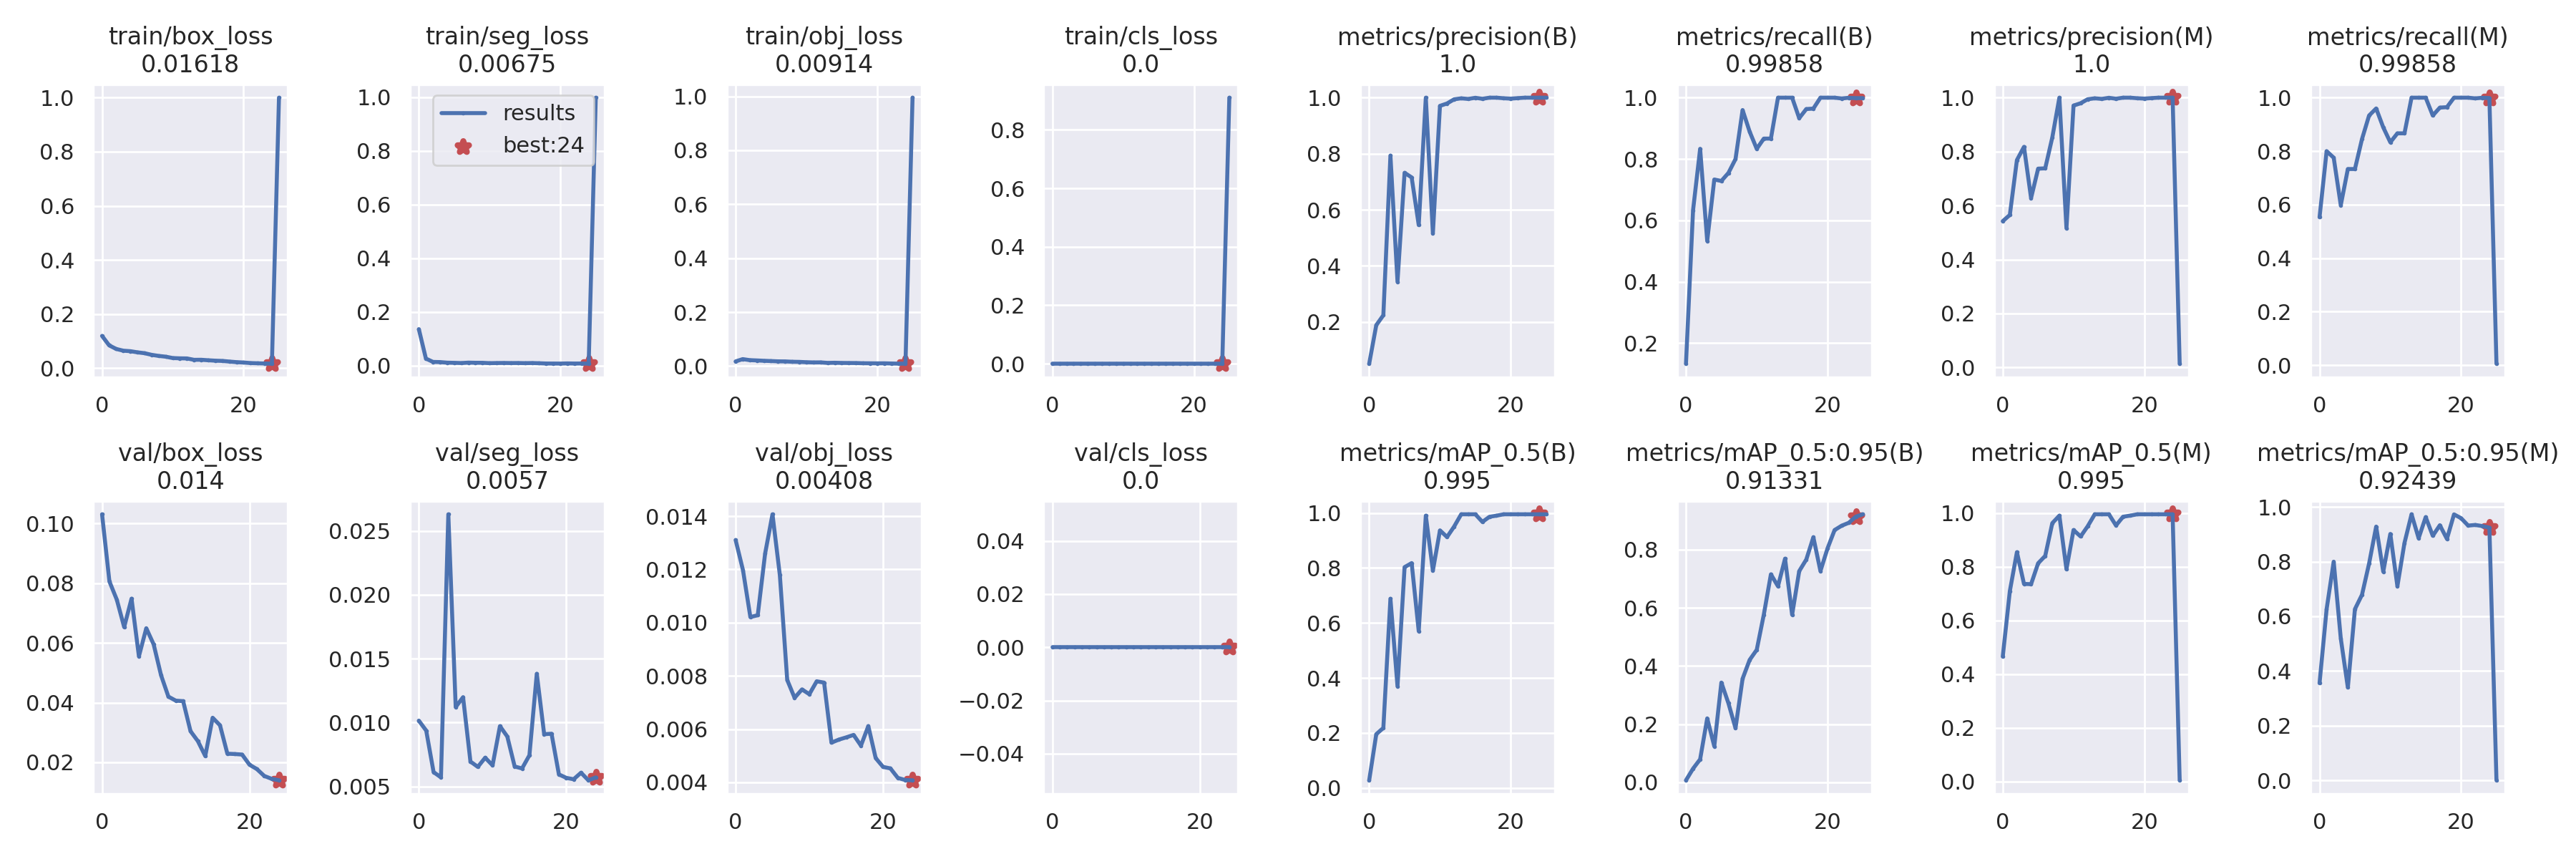

In [12]:
display.Image(filename=f'/content/yolov5/runs/train-seg/exp3/results.png', width=1200)

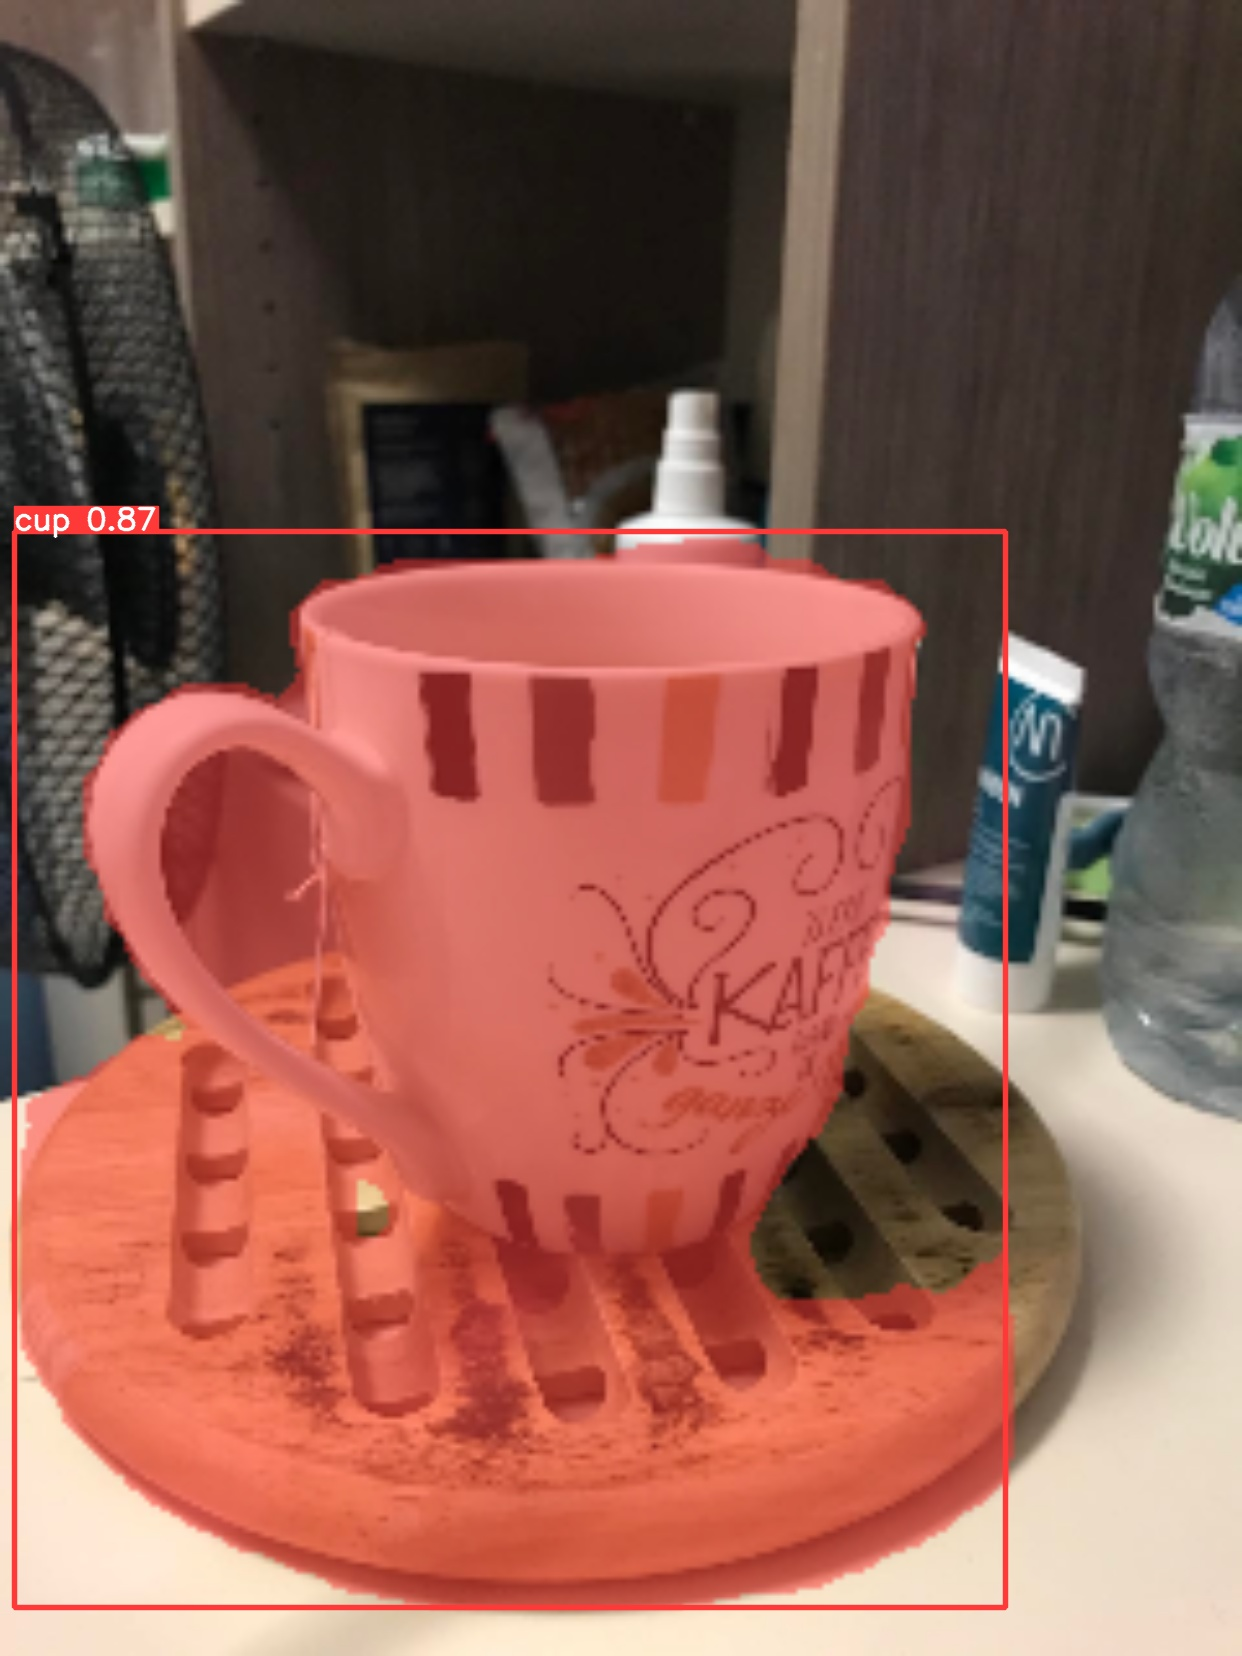

In [23]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp3/weights/best.pt --source {'/content/demo.jpg'}
display.Image(filename=f'runs/predict-seg/exp4/demo.jpg', width=600)

segment/predict: weights=['runs/train-seg/exp3/weights/best.pt'], source=/content/demo2.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/demo2.jpg: 320x256 1 cup, 11.9ms
Speed: 0.3ms pre-process, 11.9ms inference, 1.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp6


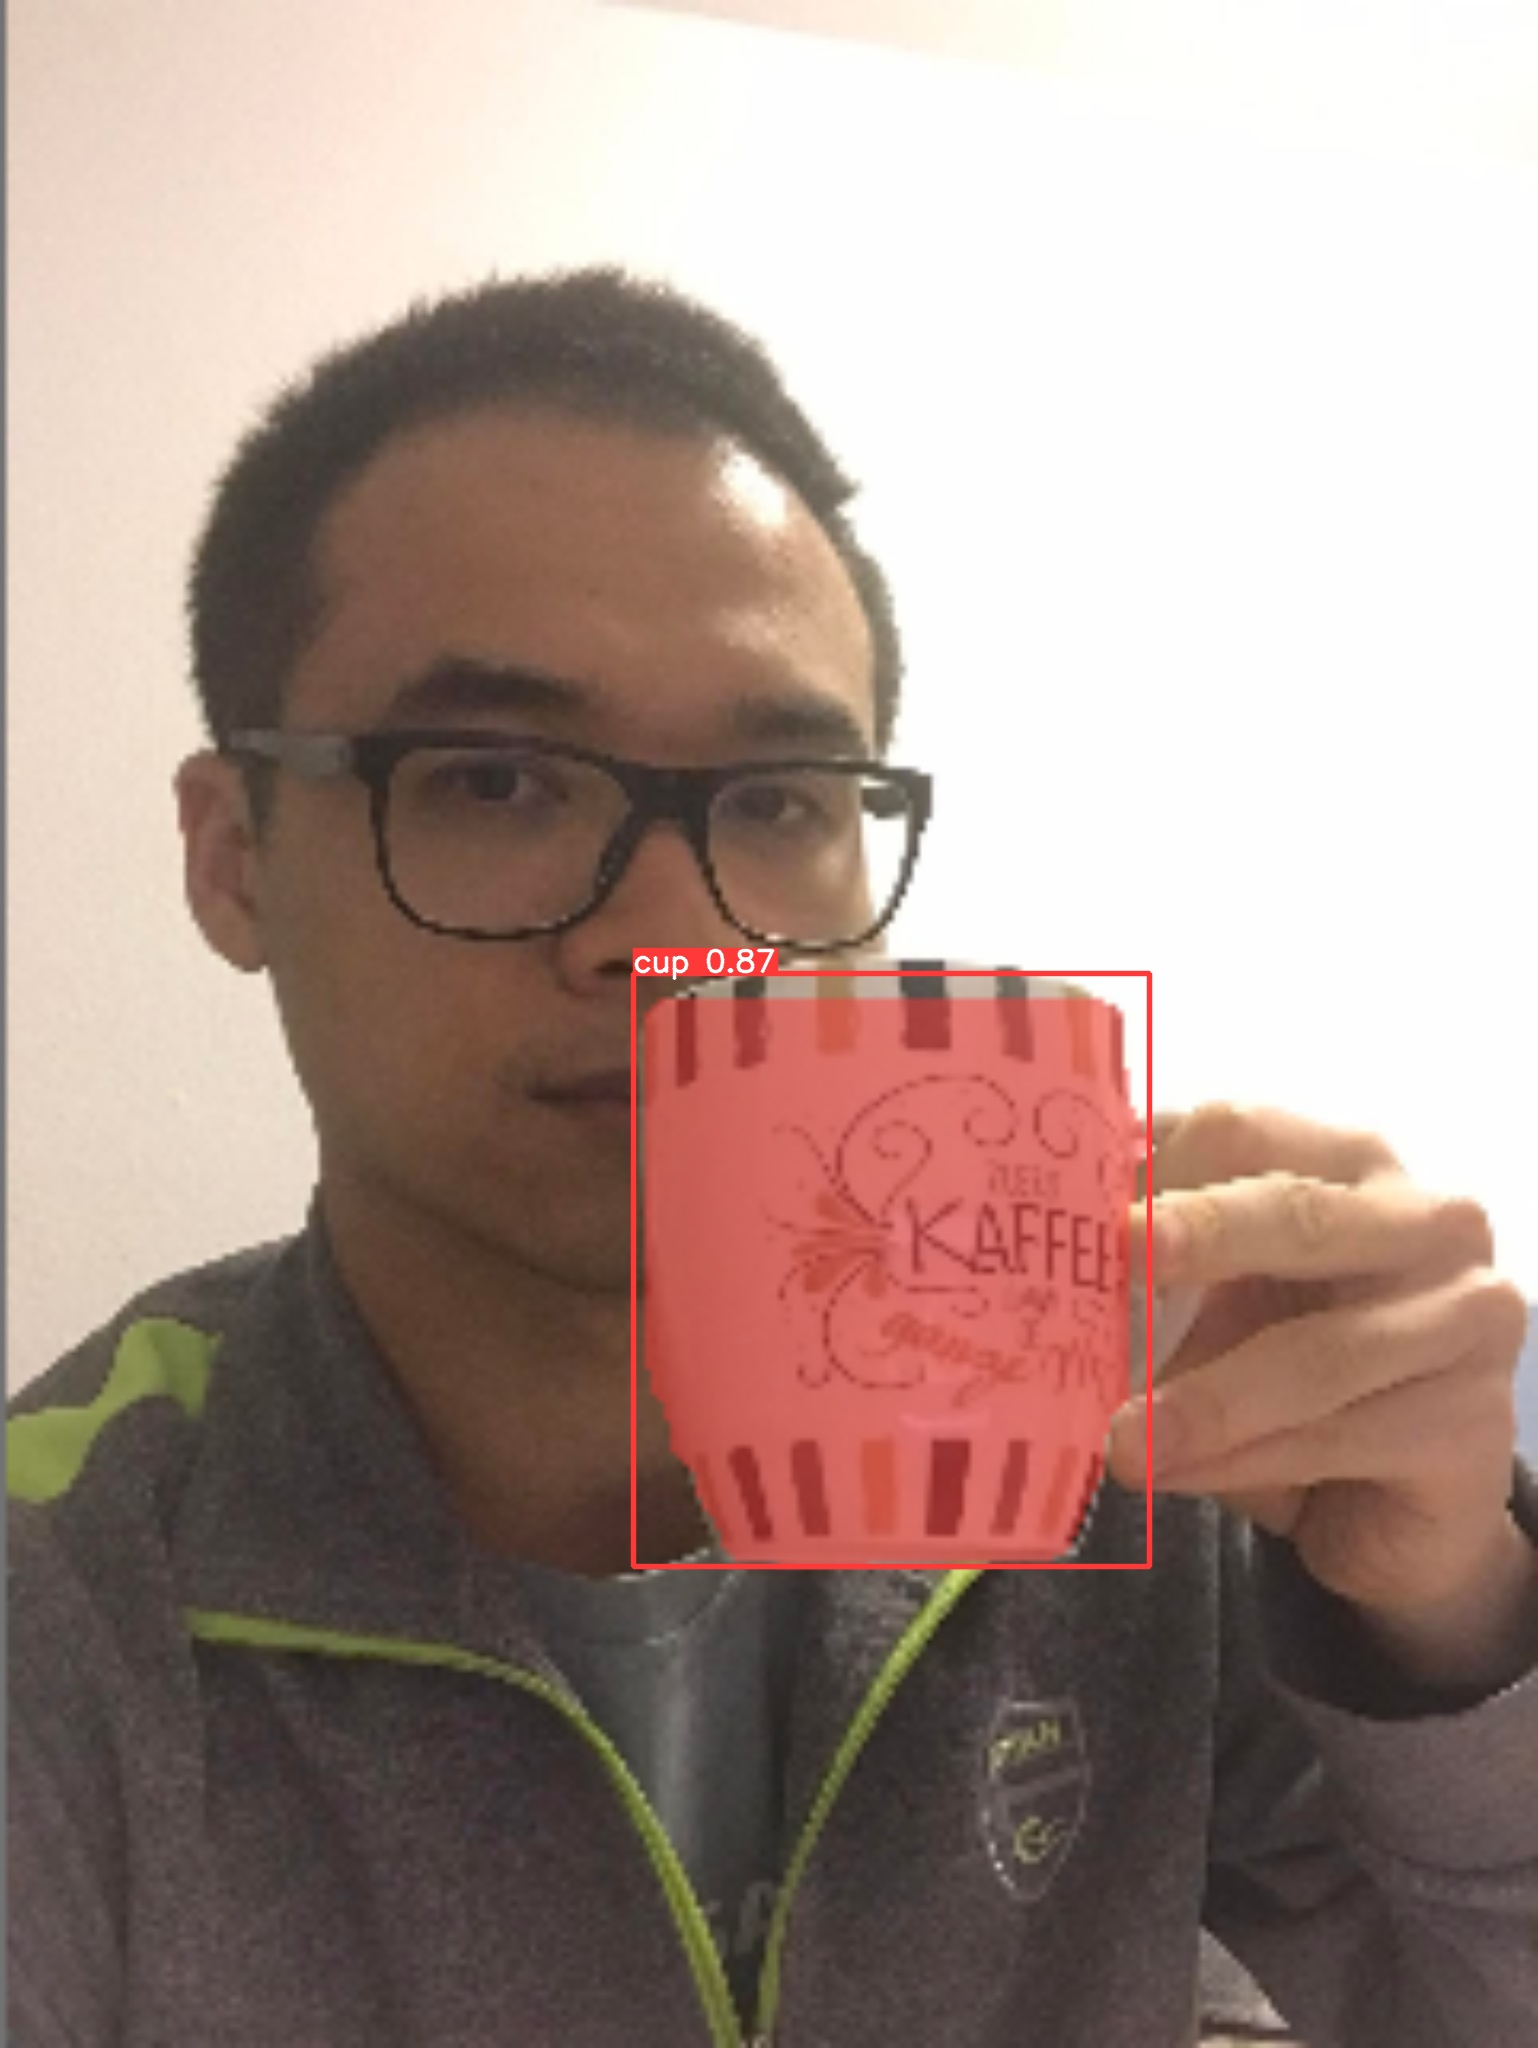

In [25]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp3/weights/best.pt --source {'/content/demo2.jpg'}
display.Image(filename=f'runs/predict-seg/exp5/demo2.jpg', width=600)
